## 1、读取多文件数据

In [1]:
import os
import pandas as pd

In [2]:
location = r'D:\Download\新建文件夹\anaconda3-2019\数分-项目\项目2-PUBG\aggregate\\'  # 项目地址，最后是 \\

In [3]:
# 获取所有文档名称并存到列表中
def get_file_name():
    filename = []
    os.chdir(location)  # 改变当前目录
    os.listdir(location)  # 展示目录下文件
    for files in os.listdir('.'):  # .显示当前目录的文件并获取目标文档名列表
        if files.startswith('agg_match_stats') and files.endswith('.csv'):
            filename.append(files)
    print(filename)
    return filename


In [4]:
# 获取文档
def get_file(filename):
    location1 = location + filename  # 读取文档列表里的文档名
    try:
        return pd.read_csv(location1, sep=',', header=0)
    except Exception as e:
        print('Error:', e)

In [5]:
# 获取多少份文档
def get_num_list(n):
    return list(range(n))


if __name__ == '__main__':
    filename = get_file_name()
    dflist = [get_file(filename[i]) for i in get_num_list(2)]  # 获取两份文档并拼接
    meta_data = pd.concat(dflist, ignore_index=True)
    print('数据形状')
    print(meta_data.shape)

['agg_match_stats_0.csv', 'agg_match_stats_1.csv', 'agg_match_stats_2.csv', 'agg_match_stats_3.csv', 'agg_match_stats_4.csv']
数据形状
(27693562, 15)


In [6]:
# # 数据预览
print('数据前五行')
print(meta_data.head(5))

数据前五行
                       date  game_size  \
0  2017-11-26T20:59:40+0000         37   
1  2017-11-26T20:59:40+0000         37   
2  2017-11-26T20:59:40+0000         37   
3  2017-11-26T20:59:40+0000         37   
4  2017-11-26T20:59:40+0000         37   

                                            match_id match_mode  party_size  \
0  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
1  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
2  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
3  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
4  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   

   player_assists  player_dbno  player_dist_ride  player_dist_walk  \
0               0            1        2870.72400       1784.847780   
1               0            1        2938.40723       1756.079710   
2               0            0           0.00000        

In [7]:
print('数据形状')
print(meta_data.shape)

数据形状
(27693562, 15)


In [8]:
print('数据列项')
print(meta_data.columns)

数据列项
Index(['date', 'game_size', 'match_id', 'match_mode', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement'],
      dtype='object')


In [9]:
print('数据信息')
print(meta_data.info)

数据信息
<bound method DataFrame.info of                               date  game_size  \
0         2017-11-26T20:59:40+0000         37   
1         2017-11-26T20:59:40+0000         37   
2         2017-11-26T20:59:40+0000         37   
3         2017-11-26T20:59:40+0000         37   
4         2017-11-26T20:59:40+0000         37   
...                            ...        ...   
27693557  2017-12-24T12:41:24+0000         28   
27693558  2017-12-24T12:41:24+0000         28   
27693559  2017-12-24T12:41:24+0000         28   
27693560  2017-12-24T12:41:24+0000         28   
27693561  2017-12-24T12:41:24+0000         28   

                                                   match_id match_mode  \
0         2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp   
1         2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp   
2         2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp   
3         2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp   
4   

## 2、探索性数据分析

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy import stats
import seaborn as sns

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.style.use('ggplot')  # 使用ggplot风格

In [12]:
# 是否获得胜利
def is_win(rank):
    label = 0
    if rank == 1:
        label = 1
    return label

In [13]:
# 是否使用过车辆
def is_drive(distance):
    label = 0
    if distance != 0:
        label = 1
    return label

In [14]:
# 选择分析的列数据
used_data = meta_data[
        ['match_id', 'game_size', 'match_mode', 'party_size', 'team_id', 'team_placement', 'player_kills',
         'player_dbno', 'player_assists', 'player_dmg', 'player_dist_ride', 'player_dist_walk', 'player_survive_time']]


In [15]:
# 去除重复的比赛id数据，不过可能丢掉同一场比赛的多位玩家数据
unique_match_data = used_data.drop_duplicates('match_id')
unique_match_data.set_index(np.arange(unique_match_data.shape[0]), inplace=True)  # 重设index成排序
unique_match_data.isnull().all()  # 检查各列是否有空值
unique_match_data.to_csv('./unique_match_data.csv', index=False)

In [16]:
# 添加是否获得胜利的列
pro_unique_match_data = unique_match_data.copy()
pro_unique_match_data['win_victory'] = unique_match_data['team_placement'].apply(is_win)
# 添加是否使用过车辆的列
pro_unique_match_data['has_drive_player'] = unique_match_data['player_dist_ride'].apply(is_drive)

In [17]:
# 查看共有多少场比赛
unique_match_counts = pd.value_counts(pro_unique_match_data['match_id']).count()
print(r'共有比赛%d场(不含相同场次)' % unique_match_counts)
print('')

共有比赛299984场(不含相同场次)



In [18]:
# 游戏模式统计
match_mode_counts = pro_unique_match_data['match_mode'].value_counts()
print('游戏模式占比')
print(r'tpp(第三人称):%.2f%%' % (match_mode_counts * 100 / pro_unique_match_data.shape[0]))
print('')

游戏模式占比
tpp(第三人称):100.00%



游戏中没有驾驶过车辆玩家的占比为58.26%
驾驶过车辆玩家的占比为41.74%



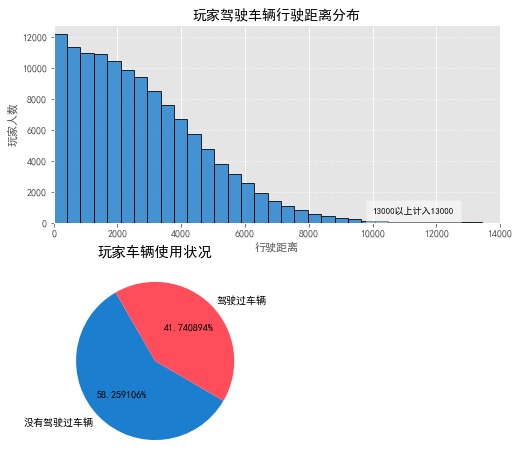

In [19]:
# 玩家驾驶车辆行驶距离数据
fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
x = pro_unique_match_data[pro_unique_match_data['player_dist_ride'] != 0]['player_dist_ride']  # 去除掉玩家使用车辆行驶距离为0的数据
x[x >= 13000].replace(13000)  # 超过行驶距离13000的数据算作13000
plt.hist(x, edgecolor='k', density=0, bins=150, facecolor='#1C7ECE', lw=1, alpha=.8)  # 玩家驾驶车辆行驶距离分布
plt.xlim(0, 14000)
plt.title('玩家驾驶车辆行驶距离分布', fontsize=14)
plt.xlabel('行驶距离', fontsize=11)
plt.ylabel('玩家人数', fontsize=11)
plt.text(10000, 550, '13000以上计入13000', style='italic', bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 7}, fontsize=9)
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
no_drive_player = pro_unique_match_data['player_dist_ride'].value_counts()[0] / pro_unique_match_data.shape[0]
print('游戏中没有驾驶过车辆玩家的占比为%.2f%%' % (no_drive_player * 100))
print('驾驶过车辆玩家的占比为%.2f%%' % ((1 - no_drive_player) * 100))
print('')

plt.subplot(2, 2, 3)
plt.title('玩家车辆使用状况')
plt.pie([no_drive_player, 1 - no_drive_player], labels=['没有驾驶过车辆', '驾驶过车辆'], autopct='%f%%',
            colors=['#1C7ECE', '#FF4D5B'], startangle=120)
plt.show()


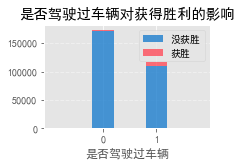

In [20]:
# 是否驾驶过车辆对获得胜利的影响

plt.subplot(2, 2, 4)
ct = pd.crosstab(index=pro_unique_match_data['win_victory'], columns=pro_unique_match_data['has_drive_player'])
ct_df = pd.DataFrame(ct)
plt.bar(ct_df.index, ct_df.loc[0] - ct_df.loc[1], label='没获胜', width=0.4, color='#1C7ECE', alpha=.8)
plt.bar(ct_df.index, ct_df.loc[1], bottom=(ct_df.loc[0] - ct_df.loc[1]), label='获胜', width=0.4, color='#FF4D5B',
            alpha=.8)
plt.xlim(-1.1, 2)
plt.xticks(ct_df.index)
plt.xlabel('是否驾驶过车辆')
plt.legend()
plt.title('是否驾驶过车辆对获得胜利的影响')
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.tight_layout()
plt.savefig('../drive_status.png', dpi=300)
plt.show()

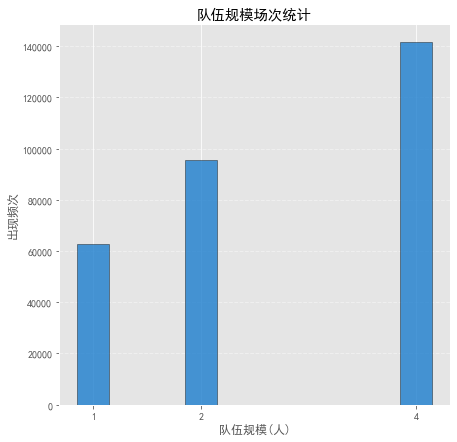

In [21]:
# 队伍规模频次统计
fig = plt.figure(figsize=(7, 7))
x = pro_unique_match_data['party_size'].value_counts()
plt.title('队伍规模场次统计')
plt.xlabel(r'队伍规模(人)')
plt.ylabel('出现频次')
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.bar(x.index, x, edgecolor='k', width=0.3, facecolor='#1C7ECE', alpha=.8)
plt.xticks(x.index)
plt.savefig('../party_size.png', dpi=300)
plt.show()

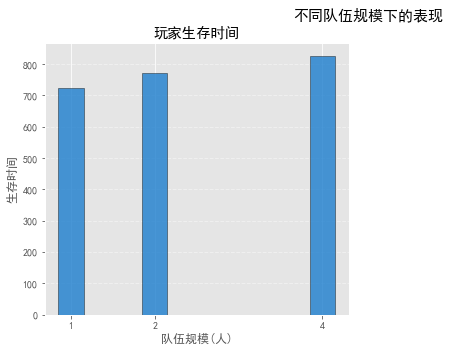

In [42]:
# 不同队伍规模的玩家生存时间
fig = plt.figure(figsize=(12, 5))
fig.suptitle('不同队伍规模下的表现', fontsize=15)
plt.subplot(1, 2, 1)
survive_time_group_by_size = pro_unique_match_data.groupby('party_size')['player_survive_time'].mean()
survive_time_group_by_size_df = pd.DataFrame(survive_time_group_by_size).reset_index()
plt.title('玩家生存时间')
plt.xlabel(r'队伍规模(人)')
plt.ylabel('生存时间')
plt.bar(survive_time_group_by_size_df['party_size'], survive_time_group_by_size_df['player_survive_time'],
            edgecolor='k', width=0.3, facecolor='#1C7ECE', alpha=.8)
plt.xticks(survive_time_group_by_size.index)
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.show()

不同队伍规模的平均排名
party_size
1    47.547335
2    24.382901
4    13.639568
Name: team_placement, dtype: float64


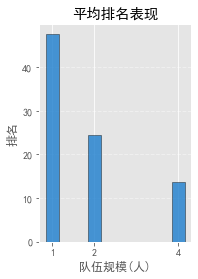

In [23]:
# 不同队伍规模的排名表现
plt.subplot(1, 2, 2)
party_size_group_by_placement = pro_unique_match_data.groupby('party_size')['team_placement'].mean()
print('不同队伍规模的平均排名')
print(party_size_group_by_placement)
party_size_group_by_placement_df = pd.DataFrame(party_size_group_by_placement).reset_index()
plt.title('平均排名表现')
plt.xlabel(r'队伍规模(人)')
plt.ylabel('排名')
plt.bar(party_size_group_by_placement_df['party_size'], party_size_group_by_placement_df['team_placement'],
            edgecolor='k', width=0.3, facecolor='#1C7ECE', alpha=.8)
plt.xticks(survive_time_group_by_size.index)
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.savefig('../party_size_vs_survive_time.png', dpi=300)
plt.show()


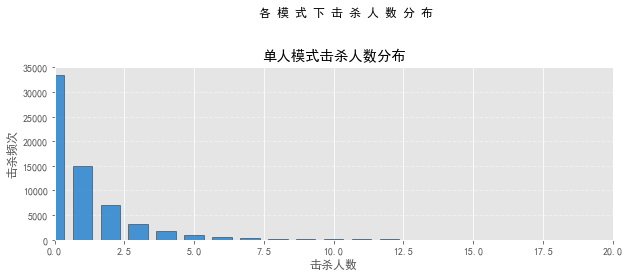

In [24]:
# 取得单人模式比赛数据
fig = plt.figure(figsize=(10, 7))
fig.suptitle('各 模 式 下 击 杀 人 数 分 布', x=0.53, y=1)
plt.subplot(2, 1, 1)
single_player_match = unique_match_data.loc[unique_match_data['party_size'] == 1]
# 单人模式下击杀统计
x = single_player_match['player_kills']
plt.title('单人模式击杀人数分布')
plt.bar(x.value_counts().index.values, x.value_counts(), edgecolor='k', width=0.7, color='#1C7ECE', alpha=.8)
# plt.xticks(x.value_counts().index.values)
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.xlim(0, 20)
plt.xlabel(r'击杀人数')
plt.ylabel('击杀频次')
plt.show()

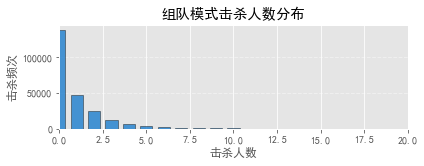

In [25]:
# 组队模式下击杀统计
plt.subplot(2, 1, 2)
team_player_match = pro_unique_match_data.loc[pro_unique_match_data['party_size'] != 1]
x = team_player_match['player_kills']
# sns.distplot(x, hist=True)
plt.bar(x.value_counts().index.values, x.value_counts(), edgecolor='k', width=0.7, color='#1C7ECE', alpha=.8)
plt.xlim(0, 20)
plt.xlabel(r'击杀人数')
plt.ylabel('击杀频次')
plt.title('组队模式击杀人数分布')
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.tight_layout()
plt.savefig('../single_player_status.png', dpi=300)
plt.show()

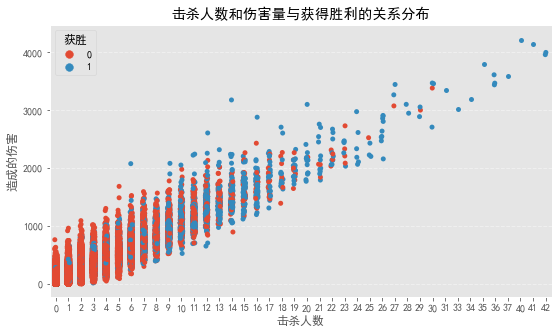

In [26]:
# 击杀人数和造成伤害与获得胜利的关系
fig = plt.figure(figsize=(9, 5))
pro_unique_match_data['获胜'] = pro_unique_match_data['win_victory']
g = sns.stripplot(data=pro_unique_match_data[['获胜', 'player_dmg', 'player_kills']], x='player_kills',
                  y='player_dmg', hue='获胜')
g.set(title='击杀人数和伤害量与获得胜利的关系分布', xlabel='击杀人数', ylabel='造成的伤害')
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.savefig('../kill_dmg_win.png', dpi=300)
plt.show()

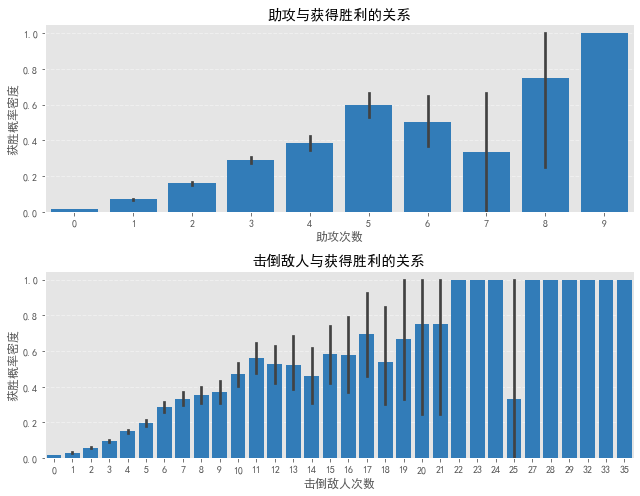

In [27]:
# 各变量与获胜的关系
fig = plt.figure(figsize=(9, 7))
plt.subplot(2, 1, 1)
# 助攻与获得胜利的关系
g = sns.barplot(data=pro_unique_match_data[['win_victory', 'player_assists']], x='player_assists', y='win_victory',
                color='#1C7ECE')
g.set(title='助攻与获得胜利的关系', xlabel='助攻次数', ylabel='获胜概率密度')
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
# 击倒敌人与获得胜利的关系
plt.subplot(2, 1, 2)
g = sns.barplot(data=pro_unique_match_data[['win_victory', 'player_dbno']], x='player_dbno', y='win_victory',
                color='#1C7ECE')
g.set(title='击倒敌人与获得胜利的关系', xlabel='击倒敌人次数', ylabel='获胜概率密度')
plt.grid(True, linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.tight_layout()
plt.savefig('..factors_vs_win.png', dpi=300)
plt.show()

## 3、机器学习部分

In [28]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
# 去除重复的比赛id数据，不过可能丢掉同一场比赛的多位玩家数据
unique_match_data = used_data.drop_duplicates('match_id')
unique_match_data.set_index(np.arange(unique_match_data.shape[0]), inplace=True)  # 重设index成排序

pro_unique_match_data = unique_match_data.copy()

In [30]:
# 是否获得胜利作为标签y
pro_unique_match_data['label'] = unique_match_data['team_placement'].apply(is_win)


In [31]:
# 选择数字型数据
numeric_cols = ['game_size', 'player_kills', 'player_dbno', 'player_assists', 'player_dmg', 'player_dist_ride',
                'player_dist_walk', 'player_survive_time']
# 选择类别型数据
category_cols = ['party_size', ]
# 选择标签列
label_col = ['label']

In [32]:
# 最后组成的数据集
user_cols = numeric_cols + category_cols + label_col
final_samples = pro_unique_match_data[user_cols]
# 去掉空值
final_samples.dropna(inplace=True)
final_samples.to_csv('./ml_final_samples.csv', index=False)

numeric_feat = final_samples[numeric_cols].values
category_val = final_samples[category_cols].values[:, 0]  # 如果有多列，每次处理一列


D:\Program Files (x86)\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
# 处理类别数据
# label encoder
# label_enc = preprocessing.LabelEncoder()
# label_val = label_enc.fit_transform(category_val)
label_val = category_val.reshape(-1, 1)
# one-hot encoder
onehot_enc = preprocessing.OneHotEncoder()
category_feat = onehot_enc.fit_transform(label_val)
category_feat = category_feat.toarray()

In [34]:
# 生成最终特征和标签用于模型的训练
X = np.hstack((numeric_feat, category_feat))
y = final_samples[label_col].values

In [35]:
# 数据集信息
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                               n_pos_sample / n_sample,
                                               n_neg_sample / n_sample))
print('特征维数：', X.shape[1])


样本个数：299984; 正样本占3.19%; 负样本占96.81%
特征维数： 11


In [36]:
# 处理不平衡数据
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y.ravel())
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                               n_pos_sample / n_sample,
                                               n_neg_sample / n_sample))


通过SMOTE方法平衡正负样本后
样本个数：580810; 正样本占50.00%; 负样本占50.00%


In [37]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3, random_state=42)


In [38]:
# 生成逻辑回归模型
# 交叉验证
LR_model = LogisticRegressionCV(Cs=np.logspace(-3, 4, 8), cv=5)
LR_model.fit(X_train, y_train)
print('超参数：\n', LR_model.C_)
y_pred = LR_model.predict(X_test)

D:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

超参数：
 [1.]


In [39]:
# 评价效果
accuracy = metrics.accuracy_score(y_pred, y_test)
precision = metrics.precision_score(y_pred, y_test, pos_label=1)
recall = metrics.recall_score(y_pred, y_test, pos_label=1)
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
fpr, tpr, _ = metrics.roc_curve(y_test.ravel(), y_pred.ravel())
print('AUC:\t', metrics.auc(fpr, tpr))
auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC(System):\t', auc)  # 包计算

accuracy: 0.9065515175306296
precision: 0.9449368982632833
recall: 0.8777305970649976
AUC:	 0.9065098361446824
AUC(System):	 0.9065098361446824


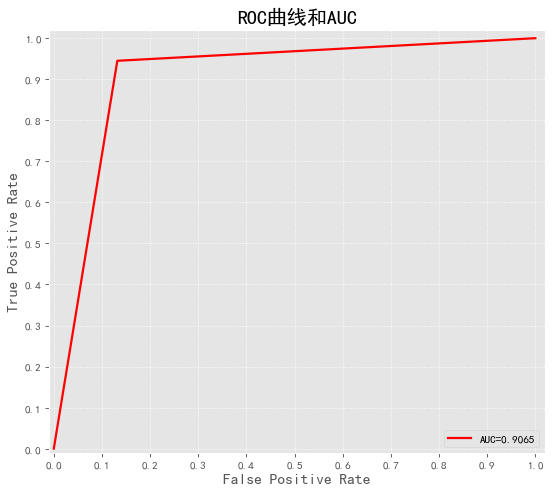

In [40]:
# ROC曲线绘图
mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 7), dpi=80, facecolor='w')
plt.plot(fpr, tpr, 'r-', lw=2, label='AUC=%.4f' % auc)
plt.legend(loc='lower right')
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.grid(b=True, ls=':')
plt.title('ROC曲线和AUC', fontsize=18)
plt.show()
